<a href="https://colab.research.google.com/github/mits-ds/Udemy_TF2/blob/main/MM_TF2_0_RNN_MNIST_(v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.2


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0407 - val_accuracy: 0.9879
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0574 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0445 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0386 - val_accuracy

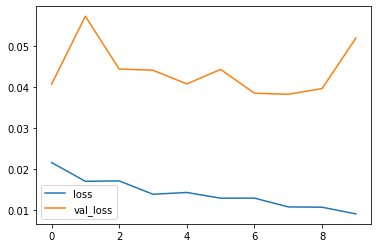

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

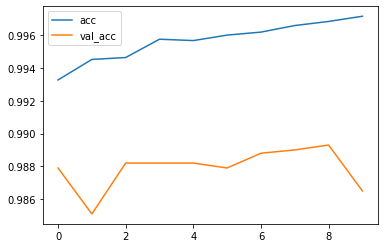

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    0    0    1    1    0]
 [   1    1 1026    1    1    0    0    1    1    0]
 [   0    0    7 1002    0    0    0    0    1    0]
 [   1    0    0    0  961    0    6    1    1   12]
 [   0    1    1   10    0  876    1    0    0    3]
 [   3    1    1    0    2    2  943    0    6    0]
 [   0    4   10    1    0    0    0 1009    0    4]
 [   0    0    6   14    0    5    0    5  943    1]
 [   0    1    3    0    1    1    0    7    1  995]]


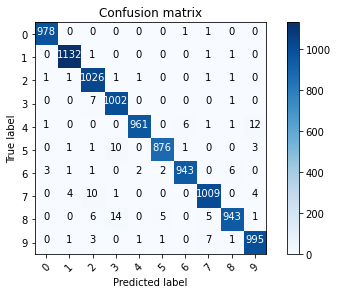

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

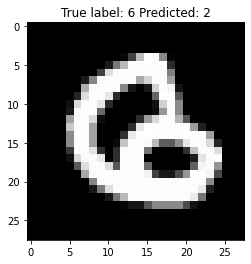

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));